In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-dataset/Housing.csv


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/kaggle/input/housing-dataset/Housing.csv")

In [4]:
#Exploratory analysis
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
data.shape

(545, 13)

In [7]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [9]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
data.drop_duplicates(inplace = True)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [11]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


               area    bedrooms   bathrooms     stories
count    545.000000  545.000000  545.000000  545.000000
mean    5150.541284    2.965138    1.286239    1.805505
std     2170.141023    0.738064    0.502470    0.867492
min     1650.000000    1.000000    1.000000    1.000000
25%     3600.000000    2.000000    1.000000    1.000000
50%     4600.000000    3.000000    1.000000    2.000000
75%     6360.000000    3.000000    2.000000    2.000000
max    16200.000000    6.000000    4.000000    4.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

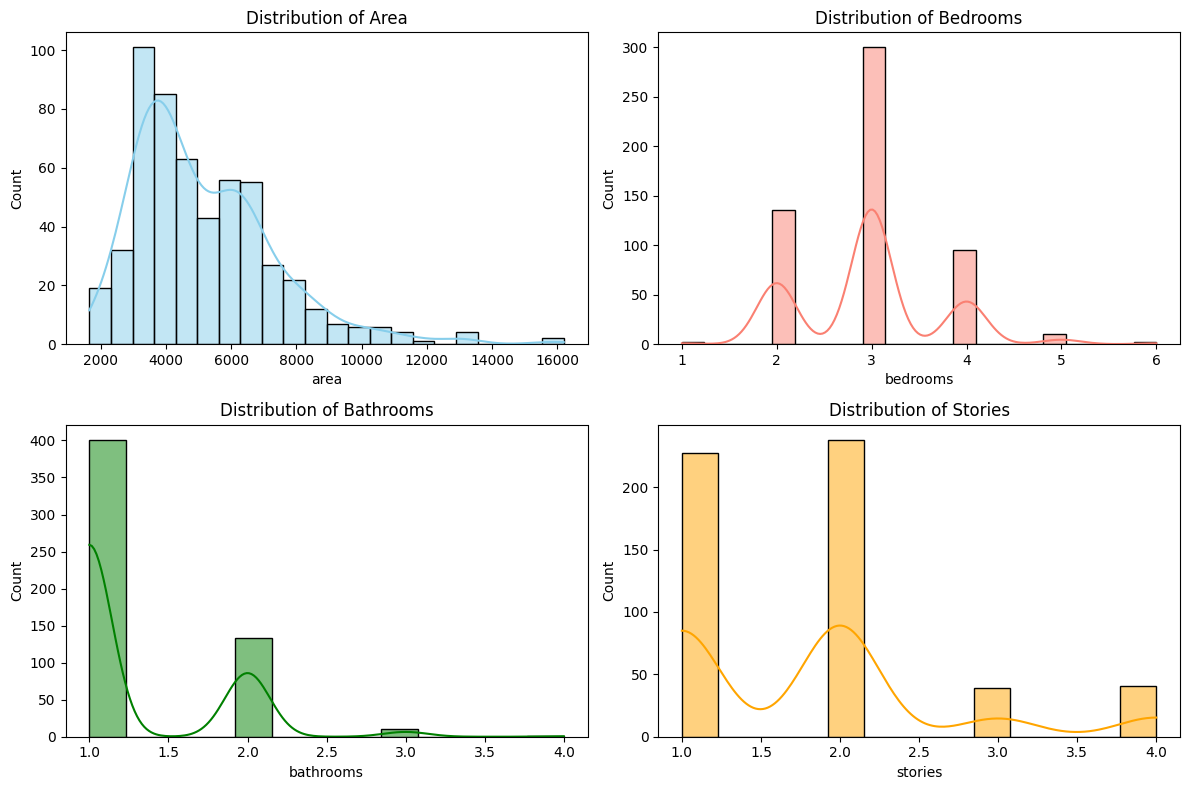

In [12]:
#Feature Selection: 
import pandas as pd

# Assuming your DataFrame is named 'df'
summary_stats = data[['area', 'bedrooms', 'bathrooms', 'stories']].describe()
print(summary_stats)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms
sns.histplot(data['area'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Area')

sns.histplot(data['bedrooms'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Bedrooms')

sns.histplot(data['bathrooms'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Bathrooms')

sns.histplot(data['stories'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Stories')

# Adjust layout
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

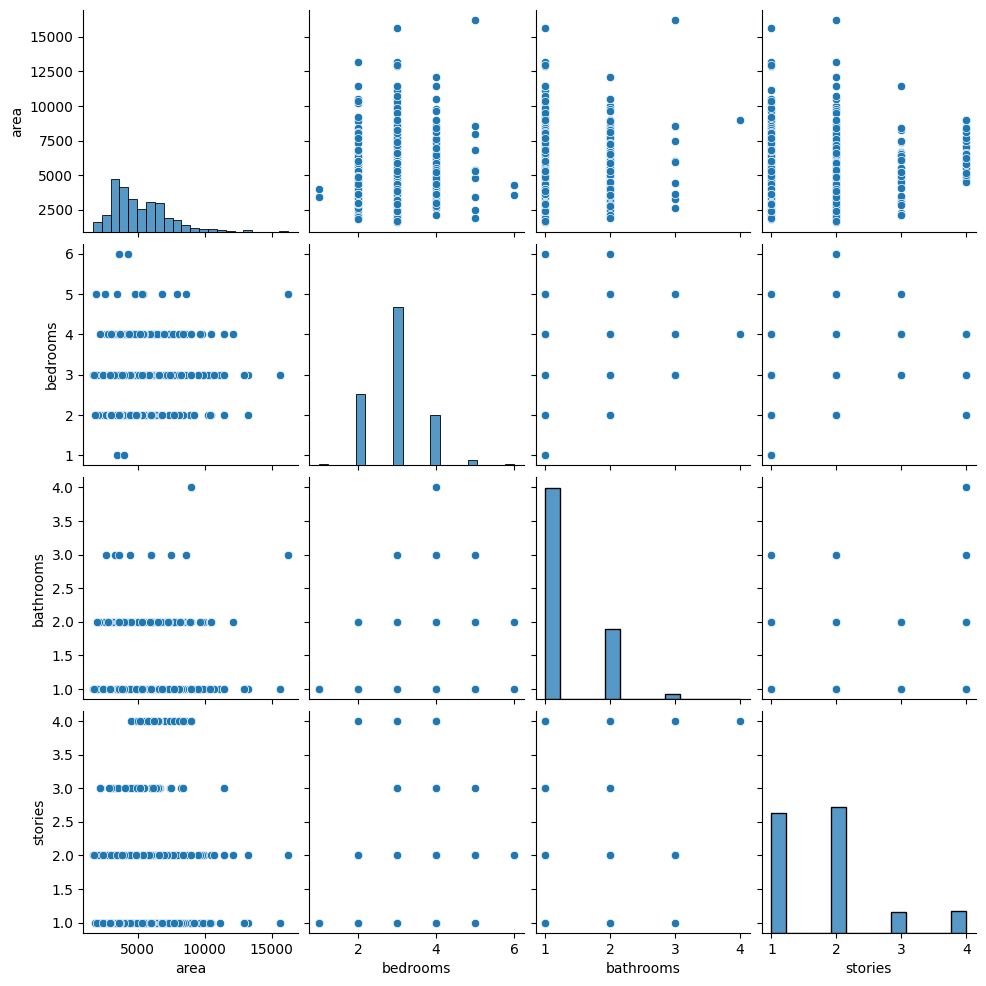

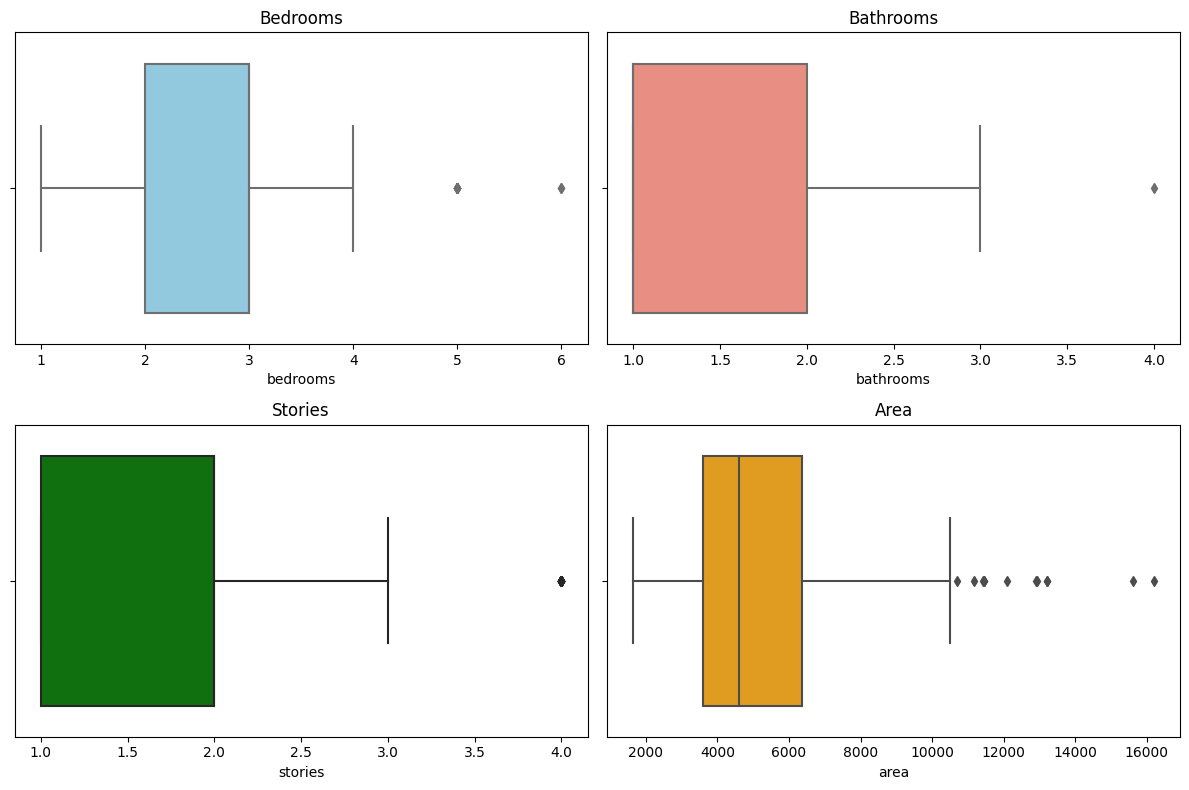

In [13]:
# Pairwise scatter plots
sns.pairplot(data[['area', 'bedrooms', 'bathrooms', 'stories']])
plt.show()

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Box plots
sns.boxplot(x=data['bedrooms'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Bedrooms')

sns.boxplot(x=data['bathrooms'], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Bathrooms')

sns.boxplot(x=data['stories'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Stories')

sns.boxplot(x=data['area'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Area')

# Adjust layout
plt.tight_layout()
plt.show()



In [14]:
# Updating the data
#Changing the finishing status column
#make a new 3 column with the values of finishing status

Furnishing_statustable = pd.get_dummies(data['furnishingstatus'])
Furnishing_statustable

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
540,False,False,True
541,False,True,False
542,False,False,True
543,True,False,False


In [15]:
#Changing the dtypes and values of the columns
Furnishing_statustable['furnished'] = Furnishing_statustable['furnished'].apply(lambda x: 1 if x == True else 0)
Furnishing_statustable

,furnished,semi-furnished,unfurnished
0,1,False,False
1,1,False,False
2,0,True,False
3,1,False,False
4,1,False,False
...,...,...,...
540,0,False,True
541,0,True,False
542,0,False,True
543,1,False,False


In [16]:
Furnishing_statustable['semi-furnished'] = Furnishing_statustable['semi-furnished'].apply(lambda x: 1 if x == True else 0)
Furnishing_statustable

,furnished,semi-furnished,unfurnished
0,1,0,False
1,1,0,False
2,0,1,False
3,1,0,False
4,1,0,False
...,...,...,...
540,0,0,True
541,0,1,False
542,0,0,True
543,1,0,False


In [17]:
Furnishing_statustable['unfurnished'] = Furnishing_statustable['unfurnished'].apply(lambda x: 1 if x == True else 0)
Furnishing_statustable

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [18]:
#Aftre deleting unfurnished col. we get.
del Furnishing_statustable['unfurnished']
Furnishing_statustable

,furnished,semi-furnished
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
540,0,0
541,0,1
542,0,0
543,1,0


In [19]:
#Before adding the furnishing_statustable
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [20]:
#Adding the furnishing_statustable
New_data = pd.concat([data,Furnishing_statustable], axis = 1)
New_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,0,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,0,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,1,0


In [21]:
#Updating data by modifying str to integer
New_data.replace({'yes': 1, 'no': 0}, inplace = True)

New_data

/tmp/ipykernel_26/4090615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  New_data.replace({'yes': 1, 'no': 0}, inplace = True)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,1,0


In [22]:
#Cleaning data
#deleting furnishingstatus column since it is of no use now.
del New_data['furnishingstatus']

In [23]:
from sklearn.preprocessing import StandardScaler

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# Ensure the 'price' column is of numeric type
New_data['price'] = pd.to_numeric(New_data['price'], errors='coerce')

# Standardizing all the numerical columns in the DataFrame
scaler = StandardScaler()
New_data[num_vars] = scaler.fit_transform(New_data[num_vars])


In [24]:
New_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1,0,1,0,0,1.517692,0,0,0
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,0,0,0,0,0,-0.805741,0,0,1
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0,0
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,0,0,0,0,0,-0.805741,0,1,0


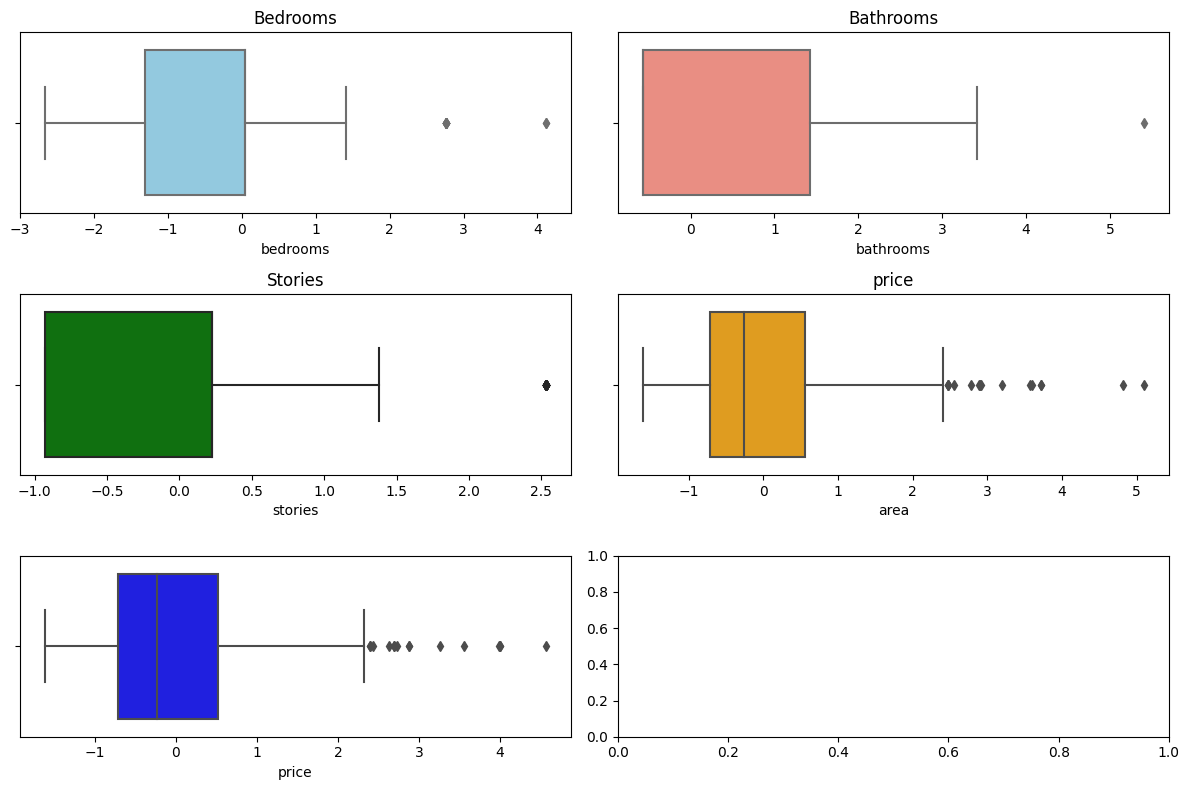

In [25]:
#Visualising for understnading of the data
# Setting up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

# Box plots
sns.boxplot(x=New_data['bedrooms'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Bedrooms')

sns.boxplot(x=New_data['bathrooms'], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Bathrooms')

sns.boxplot(x=New_data['stories'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Stories')

sns.boxplot(x=New_data['area'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Area')

sns.boxplot(x=New_data['price'], ax=axes[2, 0], color='blue')
axes[1, 1].set_title('price')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
#Deleting outliers from price 
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers from 'price' column
Q1 = New_data['price'].quantile(0.25)
Q3 = New_data['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to exclude outliers
filtered_data = New_data[(New_data['price'] >= lower_bound) & (New_data['price'] <= upper_bound)]



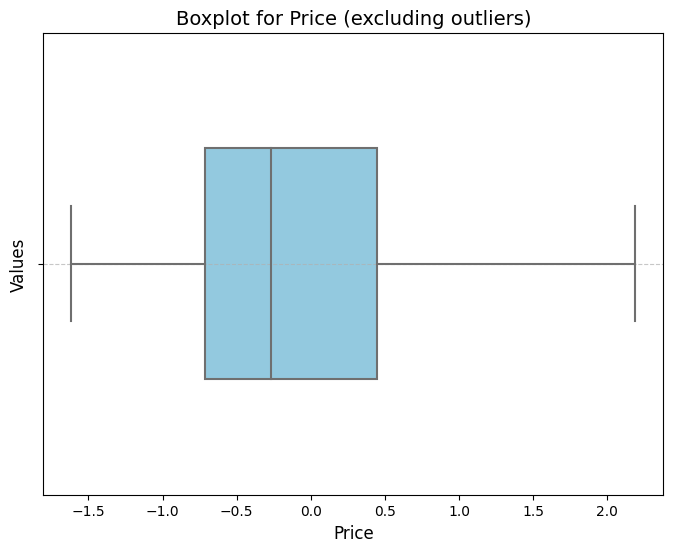

In [27]:
# Create a boxplot for 'price' without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['price'], color='skyblue', width=0.5, showfliers=False)

# Add labels and title
plt.title('Boxplot for Price (excluding outliers)', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [28]:
#Deleting outliers from area
import matplotlib.pyplot as plt
import seaborn as sns

# Remove outliers from 'price' column
Q1 = New_data['area'].quantile(0.50)
Q3 = New_data['area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to exclude outliers
filtered_data = New_data[(New_data['area'] >= lower_bound) & (New_data['area'] <= upper_bound)]



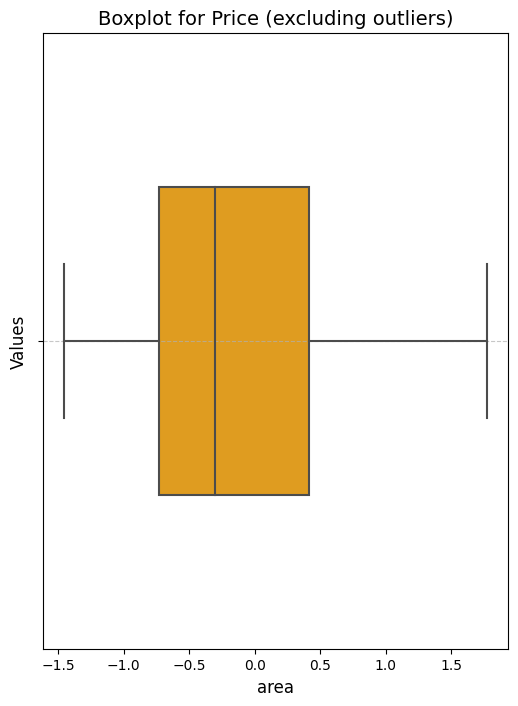

In [29]:
# Create a boxplot for 'area' after taking care of outliers
plt.figure(figsize=(6, 8))
sns.boxplot(x=filtered_data['area'], color='orange', width=0.5)

# Add labels and title
plt.title('Boxplot for Price (excluding outliers)', fontsize=14)
plt.xlabel('area', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [30]:
#Training the data by spliting
from sklearn.model_selection import train_test_split

In [31]:
# Feature selection
# Include relevant features in X (independent variables) and y (dependent variable)
X = filtered_data['area']
y = filtered_data['price']


In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2, test_size=0.2, random_state=100)

In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
#Model Training
# Create and train the linear regression model
model = LinearRegression()
LinearRegression()


LinearRegression()

In [35]:

# X_train is a 1D array and you want to reshape it to a 2D array
X_train_reshaped = X_train.values.reshape(-1, 1)

model.fit(X_train_reshaped, y_train)


LinearRegression()

In [36]:

#  X_test is a 1D array
X_test_reshaped = X_test.values.reshape(-1, 1)

# Making predictions on the reshaped test set
y_pred = model.predict(X_test_reshaped)


In [37]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.72
R-squared Score: 0.37


Mean Squared Error: 0.37

R-squared Score: 0.31

Text(0, 0.5, 'y_pred')

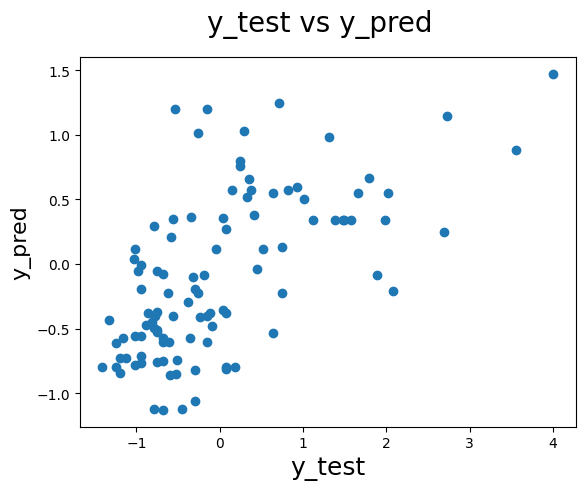

In [38]:
# Visualising the model 
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

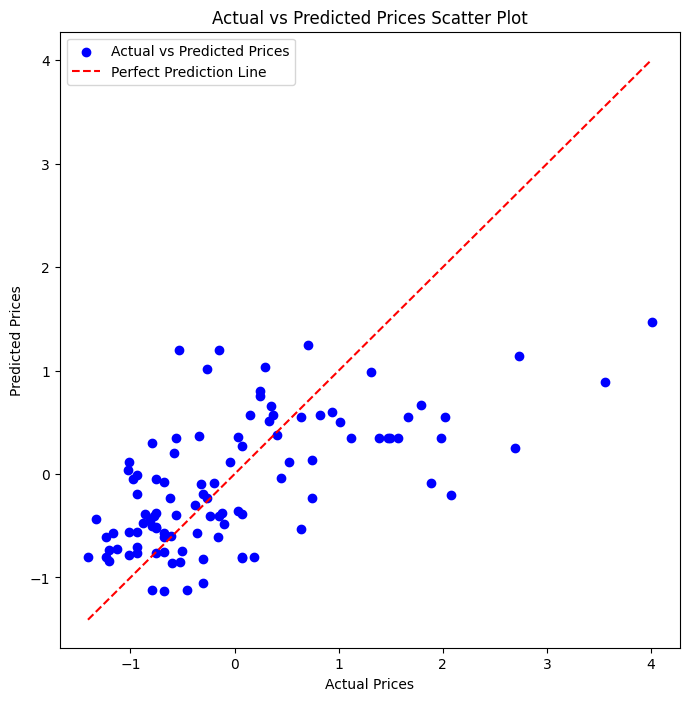

In [39]:
#Plotting linear regression line
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices Scatter Plot')
plt.legend()
plt.show()

**Positive Scatter Plot Slope:** In a scatter plot, if the points generally form a pattern where they rise from left to right, it suggests a positive correlation between the two variables.

**Positive Slope of Linear Regression Line:** A linear regression line with a positive slope further confirms the positive relationship. The slope represents the change in the dependent variable for a one-unit change in the independent variable. A positive slope indicates an increase in the dependent variable as the independent variable increases.

In practical terms, analyzing the relationship between the area of a house (independent variable) and its price (dependent variable), a positive correlation suggests that, on average, larger houses tend to have higher prices.